# Importando Bibliotecas e Dados

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [87]:
dados = pd.read_csv("/content/drive/MyDrive/data science/covid.csv", encoding="utf-8")

# Observando e tratando os dados

In [88]:
dados.head()

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
0,2020-11-05,AC,NaN,state,31248,697,234,True,881935.0000,894470.0000,12.0000,3493.4654,0.0223
1,2020-11-04,AC,NaN,state,31218,696,233,False,881935.0000,894470.0000,12.0000,3490.1115,0.0223
2,2020-11-03,AC,NaN,state,30962,695,232,False,881935.0000,894470.0000,12.0000,3461.4912,0.0224
3,2020-11-02,AC,NaN,state,30954,693,231,False,881935.0000,894470.0000,12.0000,3460.5968,0.0224
4,2020-11-01,AC,NaN,state,30951,693,230,False,881935.0000,894470.0000,12.0000,3460.2614,0.0224


In [89]:
dados.describe()

,confirmed,deaths,order_for_place,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
count,936870.0000,936870.0000,936870.0000,933215.0000,933215.0000,933215.0000,919888.0000,936870.0000
mean,1063.5806,34.9950,87.4946,99649.7807,100419.5364,3187880.2802,1025.4835,0.0358
std,13372.7341,508.0618,53.3992,1038472.3204,1046044.5021,1003370.5158,1349.5477,0.0938
min,0.0000,0.0000,1.0000,781.0000,776.0000,11.0000,0.0022,0.0000
25%,11.0000,0.0000,42.0000,6169.0000,6171.0000,2505279.0000,114.7813,0.0000
50%,58.0000,1.0000,84.0000,13649.0000,13742.0000,3138708.0000,550.2462,0.0145
75%,253.0000,5.0000,128.0000,30407.0000,30747.0000,4112306.0000,1431.0494,0.0349
max,1125936.0000,39717.0000,253.0000,45919049.0000,46289333.0000,5300108.0000,22358.3663,1.0000


* Vou tirar a notação científica e botar 4 casas decimais (para nao perder precisão)

In [90]:
pd.options.display.float_format = "{:.4f}".format

In [91]:
dados.describe()

,confirmed,deaths,order_for_place,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
count,936870.0000,936870.0000,936870.0000,933215.0000,933215.0000,933215.0000,919888.0000,936870.0000
mean,1063.5806,34.9950,87.4946,99649.7807,100419.5364,3187880.2802,1025.4835,0.0358
std,13372.7341,508.0618,53.3992,1038472.3204,1046044.5021,1003370.5158,1349.5477,0.0938
min,0.0000,0.0000,1.0000,781.0000,776.0000,11.0000,0.0022,0.0000
25%,11.0000,0.0000,42.0000,6169.0000,6171.0000,2505279.0000,114.7813,0.0000
50%,58.0000,1.0000,84.0000,13649.0000,13742.0000,3138708.0000,550.2462,0.0145
75%,253.0000,5.0000,128.0000,30407.0000,30747.0000,4112306.0000,1431.0494,0.0349
max,1125936.0000,39717.0000,253.0000,45919049.0000,46289333.0000,5300108.0000,22358.3663,1.0000


In [92]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936870 entries, 0 to 936869
Data columns (total 13 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   date                            936870 non-null  object 
 1   state                           936870 non-null  object 
 2   city                            930535 non-null  object 
 3   place_type                      936870 non-null  object 
 4   confirmed                       936870 non-null  int64  
 5   deaths                          936870 non-null  int64  
 6   order_for_place                 936870 non-null  int64  
 7   is_last                         936870 non-null  bool   
 8   estimated_population_2019       933215 non-null  float64
 9   estimated_population            933215 non-null  float64
 10  city_ibge_code                  933215 non-null  float64
 11  confirmed_per_100k_inhabitants  919888 non-null  float64
 12  death_rate      

* Analisando as informações, vemos que tem dados faltando para as colunas "city", "estimated_population_2019", "estimated_population", "city_ibge_code" e "confirmed_per_100k_inhabitants"
  - Checando a documentação do dataset, vi que quando a coluna "city" está em branco, a informação é referente ao estado

* **Visto que meu objetivo é estudar os estados do sudeste, 
vou excluir as colunas de cidade e a coluna "place_type" também, pois será desnecessária**

In [93]:
dados.drop(["city","place_type"], axis=1, inplace=True)

In [94]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936870 entries, 0 to 936869
Data columns (total 11 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   date                            936870 non-null  object 
 1   state                           936870 non-null  object 
 2   confirmed                       936870 non-null  int64  
 3   deaths                          936870 non-null  int64  
 4   order_for_place                 936870 non-null  int64  
 5   is_last                         936870 non-null  bool   
 6   estimated_population_2019       933215 non-null  float64
 7   estimated_population            933215 non-null  float64
 8   city_ibge_code                  933215 non-null  float64
 9   confirmed_per_100k_inhabitants  919888 non-null  float64
 10  death_rate                      936870 non-null  float64
dtypes: bool(1), float64(5), int64(3), object(2)
memory usage: 72.4+ MB


* Vou excluir "estimated_population_2019" pois tem valores desatualizados, segundo a documentação

In [95]:
dados.drop(["estimated_population_2019"], axis=1, inplace=True)

* "city_ibge_code" também

In [96]:
dados.drop(["city_ibge_code"], axis=1, inplace=True)

In [97]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936870 entries, 0 to 936869
Data columns (total 9 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   date                            936870 non-null  object 
 1   state                           936870 non-null  object 
 2   confirmed                       936870 non-null  int64  
 3   deaths                          936870 non-null  int64  
 4   order_for_place                 936870 non-null  int64  
 5   is_last                         936870 non-null  bool   
 6   estimated_population            933215 non-null  float64
 7   confirmed_per_100k_inhabitants  919888 non-null  float64
 8   death_rate                      936870 non-null  float64
dtypes: bool(1), float64(3), int64(3), object(2)
memory usage: 58.1+ MB


* Vou apagar a  coluna "confirmed_per_100k_inhabitants" pois, apesar de ser uma boa informação, tem valores faltantes e eu posso extrair esse tipo de informação através das outras colunas

In [98]:
dados.drop("confirmed_per_100k_inhabitants", axis = 1, inplace=True)

In [99]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936870 entries, 0 to 936869
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   date                  936870 non-null  object 
 1   state                 936870 non-null  object 
 2   confirmed             936870 non-null  int64  
 3   deaths                936870 non-null  int64  
 4   order_for_place       936870 non-null  int64  
 5   is_last               936870 non-null  bool   
 6   estimated_population  933215 non-null  float64
 7   death_rate            936870 non-null  float64
dtypes: bool(1), float64(2), int64(3), object(2)
memory usage: 50.9+ MB


In [100]:
dados[dados["estimated_population"].isnull()]

,date,state,confirmed,deaths,order_for_place,is_last,estimated_population,death_rate
26192,2020-11-02,AL,8,8,219,True,nan,1.0000
26193,2020-11-01,AL,8,8,218,False,nan,1.0000
26194,2020-10-31,AL,8,8,217,False,nan,1.0000
26195,2020-10-30,AL,8,8,216,False,nan,1.0000
26196,2020-10-29,AL,8,8,215,False,nan,1.0000
...,...,...,...,...,...,...,...,...
863547,2020-03-23,SP,0,0,5,False,nan,0.0000
863548,2020-03-22,SP,0,0,4,False,nan,0.0000
863549,2020-03-21,SP,0,0,3,False,nan,0.0000
863550,2020-03-20,SP,8,0,2,False,nan,0.0000


* Antes de decidir o que fazer com a coluna "estimated_population", vou apagar todos os outros estados fora do sudeste

In [101]:
sudeste = ["RJ", "MG", "ES", "SP"]

* Vou criar uma coluna para identificar as linhas do sudeste

In [102]:
regiao = []
for i in range(len(dados)):
  if dados["state"][i] in sudeste:
    regiao.append("Sudeste")
  else:
    regiao.append("outro")

In [103]:
dados["regiao"] = regiao

In [104]:
dadossudeste = dados[dados["regiao"] == "Sudeste"]

In [105]:
dadossudeste

,date,state,confirmed,deaths,order_for_place,is_last,estimated_population,death_rate,regiao
76251,2020-11-05,ES,159813,3896,245,True,4064052.0000,0.0244,Sudeste
76252,2020-11-04,ES,158768,3884,244,False,4064052.0000,0.0245,Sudeste
76253,2020-11-03,ES,157750,3876,243,False,4064052.0000,0.0246,Sudeste
76254,2020-11-02,ES,156681,3863,242,False,4064052.0000,0.0247,Sudeste
76255,2020-11-01,ES,156018,3862,241,False,4064052.0000,0.0248,Sudeste
...,...,...,...,...,...,...,...,...,...
936865,2020-06-23,SP,1,0,5,False,2471.0000,0.0000,Sudeste
936866,2020-06-22,SP,1,0,4,False,2471.0000,0.0000,Sudeste
936867,2020-06-21,SP,1,0,3,False,2471.0000,0.0000,Sudeste
936868,2020-06-20,SP,1,0,2,False,2471.0000,0.0000,Sudeste


In [106]:
dadossudeste.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 276220 entries, 76251 to 936869
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   date                  276220 non-null  object 
 1   state                 276220 non-null  object 
 2   confirmed             276220 non-null  int64  
 3   deaths                276220 non-null  int64  
 4   order_for_place       276220 non-null  int64  
 5   is_last               276220 non-null  bool   
 6   estimated_population  275382 non-null  float64
 7   death_rate            276220 non-null  float64
 8   regiao                276220 non-null  object 
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 19.2+ MB


- Tem poucos dados faltando, vou analisar a coluna para ver se preencho ou excluo essas linhas

- Lendo a documentação, vejo que essa coluna passa a população do estado **ou** do município.
  - **Como apenas me interessa a população do estado, vou preencher todos as linhas dela com o valor máximo da coluna de cada estado pois será equivalente à população daquele estado.**

- Vou botar a coluna "state" como index, para me ajudar

In [107]:
dadossudeste.set_index("state", inplace=True)

In [108]:
dadossudeste.loc["RJ"]

,date,confirmed,deaths,order_for_place,is_last,estimated_population,death_rate,regiao
state,,,,,,,,
RJ,2020-11-05,313843,20849,236,True,17366189.0000,0.0664,Sudeste
RJ,2020-11-04,313089,20759,235,False,17366189.0000,0.0663,Sudeste
RJ,2020-11-03,313089,20651,234,False,17366189.0000,0.0660,Sudeste
RJ,2020-11-02,311308,20636,233,False,17366189.0000,0.0663,Sudeste
RJ,2020-11-01,311014,20611,232,False,17366189.0000,0.0663,Sudeste
...,...,...,...,...,...,...,...,...
RJ,2020-03-28,11,1,5,False,273988.0000,0.0909,Sudeste
RJ,2020-03-27,9,1,4,False,273988.0000,0.1111,Sudeste
RJ,2020-03-26,7,0,3,False,273988.0000,0.0000,Sudeste


In [109]:
max(dadossudeste.loc["RJ", "estimated_population"])

17366189.0

In [110]:
dadossudeste.loc["RJ", "estimated_population"][0]

17366189.0

In [111]:
dadossudeste = dadossudeste.copy() #para não receber o SettingWithCopyWarning
for i in sudeste:
  dadossudeste.loc[i, "estimated_population"] = max(dadossudeste.loc[i, "estimated_population"])

In [112]:
dadossudeste.loc["RJ", "estimated_population"]

state
RJ   17366189.0000
RJ   17366189.0000
RJ   17366189.0000
RJ   17366189.0000
RJ   17366189.0000
          ...     
RJ   17366189.0000
RJ   17366189.0000
RJ   17366189.0000
RJ   17366189.0000
RJ   17366189.0000
Name: estimated_population, Length: 18646, dtype: float64

In [113]:
dadossudeste.info()

<class 'pandas.core.frame.DataFrame'>
Index: 276220 entries, ES to SP
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   date                  276220 non-null  object 
 1   confirmed             276220 non-null  int64  
 2   deaths                276220 non-null  int64  
 3   order_for_place       276220 non-null  int64  
 4   is_last               276220 non-null  bool   
 5   estimated_population  276220 non-null  float64
 6   death_rate            276220 non-null  float64
 7   regiao                276220 non-null  object 
dtypes: bool(1), float64(2), int64(3), object(2)
memory usage: 27.1+ MB


* Vou criar uma coluna com a razão entre casos confirmados e a população estimada no estado

In [114]:
taxacasos = []
for i in range(len(dadossudeste)):
  taxa = dadossudeste["confirmed"][i]/dadossudeste["estimated_population"][i]
  taxacasos.append(taxa)

In [115]:
dadossudeste["taxacasos"] = taxacasos

In [116]:
dadossudeste

,date,confirmed,deaths,order_for_place,is_last,estimated_population,death_rate,regiao,taxacasos
state,,,,,,,,,
ES,2020-11-05,159813,3896,245,True,4064052.0000,0.0244,Sudeste,0.0393
ES,2020-11-04,158768,3884,244,False,4064052.0000,0.0245,Sudeste,0.0391
ES,2020-11-03,157750,3876,243,False,4064052.0000,0.0246,Sudeste,0.0388
ES,2020-11-02,156681,3863,242,False,4064052.0000,0.0247,Sudeste,0.0386
ES,2020-11-01,156018,3862,241,False,4064052.0000,0.0248,Sudeste,0.0384
...,...,...,...,...,...,...,...,...,...
SP,2020-06-23,1,0,5,False,46289333.0000,0.0000,Sudeste,0.0000
SP,2020-06-22,1,0,4,False,46289333.0000,0.0000,Sudeste,0.0000
SP,2020-06-21,1,0,3,False,46289333.0000,0.0000,Sudeste,0.0000


In [117]:
dadossudeste[dadossudeste["date"] == "2020-11-05"].head(4)

,date,confirmed,deaths,order_for_place,is_last,estimated_population,death_rate,regiao,taxacasos
state,,,,,,,,,
ES,2020-11-05,159813,3896,245,True,4064052.0000,0.0244,Sudeste,0.0393
MG,2020-11-05,364541,9128,241,True,21292666.0000,0.0250,Sudeste,0.0171
RJ,2020-11-05,313843,20849,236,True,17366189.0000,0.0664,Sudeste,0.0181
SP,2020-11-05,1125936,39717,253,True,46289333.0000,0.0353,Sudeste,0.0243


# VIsualizando graficamente

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


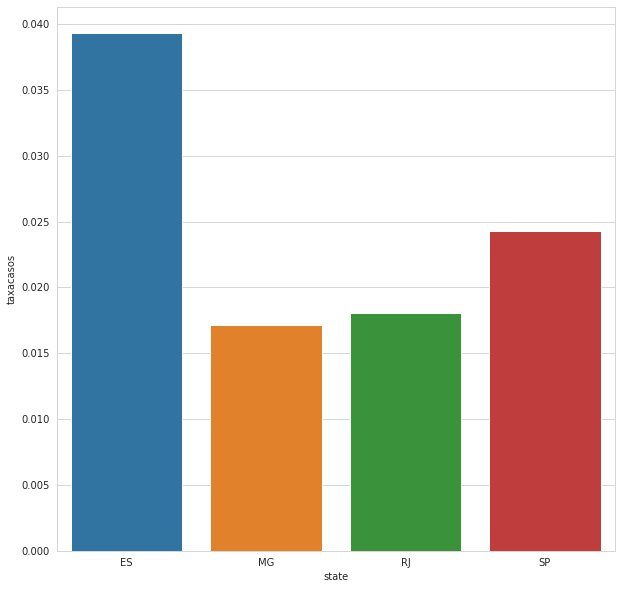

In [118]:
plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
sns.barplot(dadossudeste[dadossudeste["date"] == "2020-11-05"].head(4)["taxacasos"].index, dadossudeste[dadossudeste["date"] == "2020-11-05"].head(4)["taxacasos"])

- Observa-se que no Espírito Santo teve, até o dia 5/11/2020, a maior taxa de casos

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


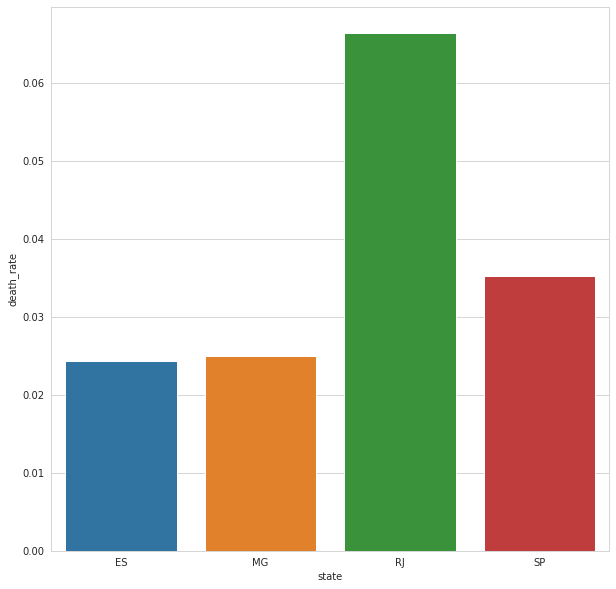

In [119]:
plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
sns.barplot(dadossudeste[dadossudeste["date"] == "2020-11-05"].head(4)["death_rate"].index, dadossudeste[dadossudeste["date"] == "2020-11-05"].head(4)["death_rate"])

- **Porém foi no Rio de Janeiro que concretizou, até o dia 5/11/2020, a maior taxa de mortes, superando por muito os outros estados do sudeste**

In [120]:
dadossudeste[dadossudeste["date"] == "2020-11-05"].head(4)["death_rate"]

state
ES   0.0244
MG   0.0250
RJ   0.0664
SP   0.0353
Name: death_rate, dtype: float64

In [121]:
[taxamorteES, taxamorteMG, taxamorteRJ, taxamorteSP] = dadossudeste[dadossudeste["date"] == "2020-11-05"].head(4)["death_rate"]

* ***No Espírito Santo obteve-se a menor taxa de mortes, portanto vou usar a taxa desse estado para realizar uma comparação com os outros estados da região***

In [122]:
taxasmortes = [taxamorteES, taxamorteMG, taxamorteRJ, taxamorteSP]

In [123]:
razoestaxa = []
for i in range(1,len(taxasmortes)):
  razaotaxa = taxasmortes[i]/taxasmortes[0]
  razoestaxa.append(razaotaxa)

In [124]:
razoestaxa

[1.0245901639344261, 2.721311475409836, 1.4467213114754096]

# Conclusão

- A taxa de morte em Minas Gerais foi 2,46% maior do que no Espírito Santo
- A taxa de morte no Rio de Janeiro foi 172,13% maior do que no Espírito Santo
- A taxa de morte em São Paulo foi 44,67% maior do que no Espírito Santo

In [125]:
dadossudeste[dadossudeste["date"] == "2020-11-05"].head(4)["estimated_population"]

state
ES    4064052.0000
MG   21292666.0000
RJ   17366189.0000
SP   46289333.0000
Name: estimated_population, dtype: float64

*Observando as taxas de casos e mortes e a população de cada estado, concluímos que:*

- Talvez pudéssemos enxergar alguma correlação entre o tamanho da população e as taxas, porém isso não aconteceu

- Espírito Santo teve a maior taxa de casos, a menor taxa de mortes e também tem a menor população. Por ser um estado pequeno e pouco populoso, era de se esperar uma maior taxa de casos, porém nao foi acompanhada de uma alta taxa de mortes, talvez por ser mais fácil de estruturar uma segurança sanitária para a pequena população.

- No Rio de Janeiro a taxa de mortes foi consideravelmente superior a dos outros estados (6,64% das pessoas contaminadas e registradas, faleceram). Talvez por ser um estado com maiores problemas a se resolver no âmbito sanitário, com hospitais superlotados e precários.

- Em Minas Gerais viu-se a menor taxa de casos e uma taxa de mortes igualmente baixa, em relação aos outros estados. Foi o estado do sudeste que respondeu melhor ao vírus, tendo em vista o tamanho da população. Vale notar que é o único estado que não encontra o mar, tendo grande parte características rurais.

- São Paulo, tendo a maior população do sudeste (mais que o dobro do segundo colocado, Minas Gerais), teve a segunda maior taxa de casos e de mortes. Tem uma economia muito ativa, com muitas pessoas de outros estados e países circulando, o que pode ter lhe conferido altas taxas, porém a sua estrutura impossibilitou que sua situação se tornasse pior do que a do Rio de Janeiro (que teve uma taxa de mortes de quase o dobro da de São Paulo), que também vive grande circulação de pessoas, principalmente na capital.